In [657]:
import pandas as pd
import numpy as np
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM, GRU
from tensorflow import keras
import tensorflow as tf
from datetime import datetime

In [658]:
dataset = read_csv("folder/subfolder/dataToModel.csv",
                 #  parse_dates={'dt' : ['Time']},
                  # infer_datetime_format=True, 
                   index_col= 0,
                   #na_values=['nan','?'],
                   sep=";")
#dataset.fillna(0, inplace=True)
values = dataset.values
# ensure all data is float
values = values.astype('float32')

In [659]:
dataset.head(4)

,rok,ms,dz,godz,fco2_MQ,fco2_HQ,fco2_raw,glwody,T50cm,T2m,...,Ku,Ld,Lu,ppp,v,vdir,Tgrunt,vwc,PARd,PARu
0,2013,1,1,0.5,0.15,0.0,0.15,5.2,1.2,1.5,...,0.9,249.3,322.9,998.5,3.4,210.5,0.6,0.785,0.0,0.0
1,2013,1,1,1.5,-0.60,0.0,-0.60,5.2,0.9,1.2,...,1.0,249.5,323.5,998.1,3.3,202.5,0.6,0.785,0.0,0.0
2,2013,1,1,2.5,0.57,0.0,0.57,5.4,0.7,1.0,...,1.0,249.7,324.0,997.6,3.3,201.6,0.6,0.785,0.0,0.0
3,2013,1,1,3.5,0.03,0.0,0.03,5.5,0.3,0.6,...,0.9,250.0,324.5,997.2,2.6,191.6,0.6,0.785,0.0,0.0


In [660]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40342 entries, 0 to 40341
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rok       40342 non-null  int64  
 1   ms        40342 non-null  int64  
 2   dz        40342 non-null  int64  
 3   godz      40342 non-null  float64
 4   fco2_MQ   23815 non-null  float64
 5   fco2_HQ   40342 non-null  float64
 6   fco2_raw  40342 non-null  float64
 7   glwody    40342 non-null  float64
 8   T50cm     40342 non-null  float64
 9   T2m       40342 non-null  float64
 10  Kd        40342 non-null  float64
 11  Ku        40342 non-null  float64
 12  Ld        40342 non-null  float64
 13  Lu        40342 non-null  float64
 14  ppp       40342 non-null  float64
 15  v         40342 non-null  float64
 16  vdir      40342 non-null  float64
 17  Tgrunt    40342 non-null  float64
 18  vwc       40342 non-null  float64
 19  PARd      40342 non-null  float64
 20  PARu      40342 non-null  fl

In [661]:
dataset.drop(columns  = ['dz','godz','ms','fco2_MQ','rok'], inplace = True)
#dataset.drop(columns  = [ 'fMOD_NN', 'fMOD_E0', 'fMODlut', 'fMODsrr','dz','godz','ms','fco2_MQ'], inplace = True)

In [662]:
dataset.head()

,fco2_HQ,fco2_raw,glwody,T50cm,T2m,Kd,Ku,Ld,Lu,ppp,v,vdir,Tgrunt,vwc,PARd,PARu
0,0.0,0.15,5.2,1.2,1.5,0.0,0.9,249.3,322.9,998.5,3.4,210.5,0.6,0.785,0.0,0.0
1,0.0,-0.60,5.2,0.9,1.2,0.0,1.0,249.5,323.5,998.1,3.3,202.5,0.6,0.785,0.0,0.0
2,0.0,0.57,5.4,0.7,1.0,0.0,1.0,249.7,324.0,997.6,3.3,201.6,0.6,0.785,0.0,0.0
3,0.0,0.03,5.5,0.3,0.6,0.0,0.9,250.0,324.5,997.2,2.6,191.6,0.6,0.785,0.0,0.0
4,0.0,0.03,5.5,-0.4,-0.0,0.0,1.5,250.2,325.1,996.8,2.2,189.1,0.6,0.785,0.0,0.0


In [663]:
dataset.drop(columns =[] , inplace = True)

In [664]:
#final dataset
dataset.head(2220)

,fco2_HQ,fco2_raw,glwody,T50cm,T2m,Kd,Ku,Ld,Lu,ppp,v,vdir,Tgrunt,vwc,PARd,PARu
0,0.0,0.15,5.2,1.2,1.5,0.0,0.9,249.3,322.9,998.5,3.4,210.5,0.6,0.785,0.0,0.0
1,0.0,-0.60,5.2,0.9,1.2,0.0,1.0,249.5,323.5,998.1,3.3,202.5,0.6,0.785,0.0,0.0
2,0.0,0.57,5.4,0.7,1.0,0.0,1.0,249.7,324.0,997.6,3.3,201.6,0.6,0.785,0.0,0.0
3,0.0,0.03,5.5,0.3,0.6,0.0,0.9,250.0,324.5,997.2,2.6,191.6,0.6,0.785,0.0,0.0
4,0.0,0.03,5.5,-0.4,-0.0,0.0,1.5,250.2,325.1,996.8,2.2,189.1,0.6,0.785,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,1.0,-5.00,3.6,20.4,19.5,665.8,80.1,327.0,443.0,1001.2,0.6,19.7,17.4,0.774,1347.1,70.6
2216,1.0,-6.26,3.4,21.6,20.8,770.0,85.6,332.4,455.7,1000.9,1.1,2.0,17.6,0.774,1575.5,70.7
2217,1.0,-0.04,3.2,22.5,21.9,841.9,91.9,337.6,465.5,1000.9,1.4,38.9,17.9,0.773,1738.3,74.9
2218,0.0,-2.90,3.1,23.1,22.5,876.3,98.5,340.0,471.3,1000.7,1.2,81.7,18.5,0.773,1798.4,85.1


In [665]:
values = dataset.values
# ensure all data is float
values = values.astype('float64')

In [666]:
# normalizing input features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
scaled =pd.DataFrame(scaled)

In [667]:
scaled.head(2220)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.518109,0.869646,0.413005,0.423423,0.000000,0.001652,0.334327,0.347342,0.535762,0.293103,0.584722,0.045045,0.795009,0.000000,0.000000
1,0.0,0.517643,0.869646,0.407733,0.418018,0.000000,0.001836,0.334990,0.349252,0.530364,0.284483,0.562500,0.045045,0.795009,0.000000,0.000000
2,0.0,0.518370,0.871508,0.404218,0.414414,0.000000,0.001836,0.335653,0.350844,0.523617,0.284483,0.560000,0.045045,0.795009,0.000000,0.000000
3,0.0,0.518034,0.872439,0.397188,0.407207,0.000000,0.001652,0.336647,0.352436,0.518219,0.224138,0.532222,0.045045,0.795009,0.000000,0.000000
4,0.0,0.518034,0.872439,0.384886,0.396396,0.000000,0.002753,0.337309,0.354346,0.512821,0.189655,0.525278,0.045045,0.795009,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,1.0,0.514905,0.854749,0.750439,0.747748,0.669213,0.147026,0.591783,0.729704,0.572200,0.051724,0.054722,0.801802,0.775401,0.655204,0.051001
2216,1.0,0.514121,0.852886,0.771529,0.771171,0.773947,0.157122,0.609675,0.770137,0.568151,0.094828,0.005556,0.810811,0.775401,0.766294,0.051073
2217,1.0,0.517991,0.851024,0.787346,0.790991,0.846216,0.168686,0.626905,0.801337,0.568151,0.120690,0.108056,0.824324,0.773619,0.845477,0.054107
2218,0.0,0.516212,0.850093,0.797891,0.801802,0.880792,0.180800,0.634858,0.819803,0.565452,0.103448,0.226944,0.851351,0.773619,0.874708,0.061475


In [668]:
def create_ts_data(dataset, lookback=1, predicted_col=0):
    temp=dataset.copy()
    temp["id"]= range(1, len(temp)+1)
    temp = temp.iloc[:-lookback, :]
    temp.set_index('id', inplace =True)
    predicted_value=dataset.copy()
    predicted_value = predicted_value.iloc[lookback:,predicted_col]
    predicted_value.columns=["Predcited"]
    predicted_value= pd.DataFrame(predicted_value)
    
    predicted_value["id"]= range(1, len(predicted_value)+1)
    predicted_value.set_index('id', inplace =True)
    final_df= pd.concat([temp, predicted_value], axis=1)
    #final_df.columns = ['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)', 'var7(t-1)', 'var8(t-1)','var1(t)']
    #final_df.set_index('Date', inplace=True)
    return final_df

In [669]:
#We now create the time series dataset with looking back one time step

reframed_df= create_ts_data(scaled, 1,0)
reframed_df.fillna(0, inplace=True)

reframed_df.columns = ['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)','var6(t-1)','var7(t-1)','var8(t-1)','var9(t-1)','var10(t-1)','var11(t-1)','var12(t-1)','var13(t-1)','var14(t-1)','var15(t-1)','var16(t-1)','var17(t-1)']
print(reframed_df.head(4))

    var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
id                                                                     
1         0.0   0.518109   0.869646   0.413005   0.423423        0.0   
2         0.0   0.517643   0.869646   0.407733   0.418018        0.0   
3         0.0   0.518370   0.871508   0.404218   0.414414        0.0   
4         0.0   0.518034   0.872439   0.397188   0.407207        0.0   

    var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  var11(t-1)  var12(t-1)  \
id                                                                        
1    0.001652   0.334327   0.347342    0.535762    0.293103    0.584722   
2    0.001836   0.334990   0.349252    0.530364    0.284483    0.562500   
3    0.001836   0.335653   0.350844    0.523617    0.284483    0.560000   
4    0.001652   0.336647   0.352436    0.518219    0.224138    0.532222   

    var13(t-1)  var14(t-1)  var15(t-1)  var16(t-1)  var17(t-1)  
id                                                 

In [670]:
# split into train and test sets
values = reframed_df.values
training_sample =int( len(dataset) *0.8)
train = values[:training_sample, :]
test = values[training_sample:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [671]:
train_X.shape

(32273, 16)

In [672]:
train_y.shape

(32273,)

In [673]:
# reshape input to be 3D [samples, time steps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(32273, 1, 16) (32273,) (8068, 1, 16) (8068,)


In [674]:
#model_gru = Sequential()
#model_gru.add(GRU(85, return_sequences=True,input_shape=(train_X.shape[1], train_X.shape[2])))
#model_gru.add(GRU(units=32, return_sequences=True))
#model_gru.add(GRU(units=32))
#model_gru.add(Dense(units=1))

#model_gru.compile(loss='mae', optimizer='adam')

In [697]:
model_gru = Sequential([
    keras.layers.GRU(85, return_sequences=True,input_shape=(train_X.shape[1], train_X.shape[2])),
    keras.layers.GRU(units=36, return_sequences=True),
    keras.layers.GRU(units=36),
    keras.layers.Dense(units=1)
])
model_gru.compile(loss='mae', optimizer='adam')
#model_gru.compile(loss='mae', optimizer='adam')

In [698]:
model_gru.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_101 (GRU)               (None, 1, 85)             26265     
                                                                 
 gru_102 (GRU)               (None, 1, 36)             13284     
                                                                 
 gru_103 (GRU)               (None, 36)                7992      
                                                                 
 dense_34 (Dense)            (None, 1)                 37        
                                                                 
Total params: 47,578
Trainable params: 47,578
Non-trainable params: 0
_________________________________________________________________


In [699]:
# fit network
gru_history = model_gru.fit(train_X, train_y, epochs=10,validation_data=(test_X, test_y), batch_size=64, shuffle=False)

Epoch 1/10
505/505 [==============================] - 14s 14ms/step - loss: 0.2377 - val_loss: 0.2538
Epoch 2/10
505/505 [==============================] - 5s 9ms/step - loss: 0.2283 - val_loss: 0.2313
Epoch 3/10
505/505 [==============================] - 4s 8ms/step - loss: 0.2246 - val_loss: 0.2502
Epoch 4/10
505/505 [==============================] - 4s 9ms/step - loss: 0.2241 - val_loss: 0.2554
Epoch 5/10
505/505 [==============================] - 6s 12ms/step - loss: 0.2235 - val_loss: 0.2541
Epoch 6/10
505/505 [==============================] - 5s 9ms/step - loss: 0.2238 - val_loss: 0.2371
Epoch 7/10
505/505 [==============================] - 4s 7ms/step - loss: 0.2223 - val_loss: 0.2287
Epoch 8/10
505/505 [==============================] - 5s 10ms/step - loss: 0.2206 - val_loss: 0.2321
Epoch 9/10
505/505 [==============================] - 5s 11ms/step - loss: 0.2196 - val_loss: 0.2274
Epoch 10/10
505/505 [==============================] - 5s 10ms/step - loss: 0.2187 - val_loss: 

In [700]:
pred_y =  model_gru.predict(test_X)

253/253 [==============================] - 2s 4ms/step


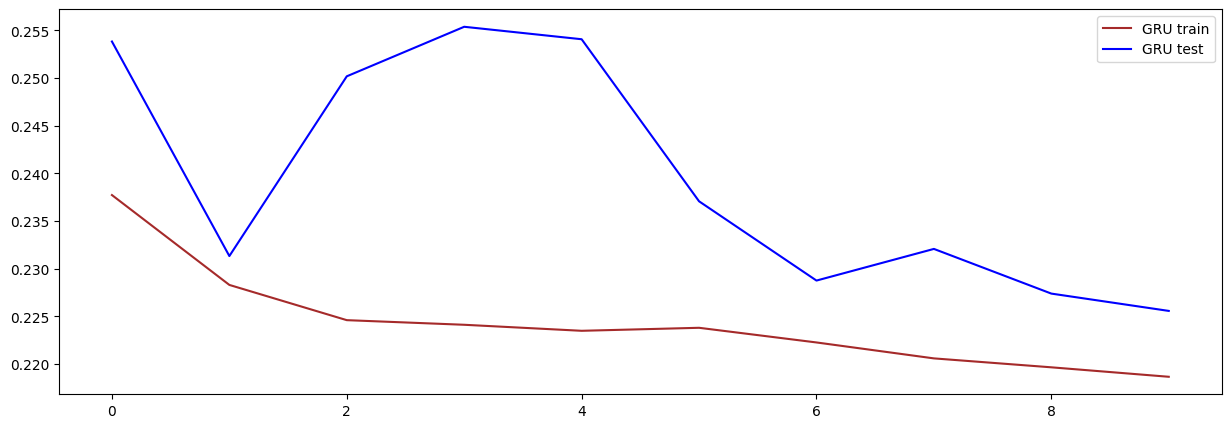

In [701]:
#dont run this cell if you are running this cell than add "validation_data=(test_X, test_y)" in model_gru.fit()
pyplot.plot(gru_history.history['loss'], label='GRU train', color='brown')
pyplot.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
pyplot.legend()
pyplot.show()

In [702]:
test_y.reshape(8086,1)
#test_y.reshape(2627,1)

ValueError: cannot reshape array of size 8068 into shape (8086,1)

In [703]:
pred_y

array([[8.4841353e-01],
       [8.3411586e-01],
       [8.3431637e-01],
       ...,
       [2.7166773e-04],
       [2.7111918e-04],
       [2.6844349e-04]], dtype=float32)

0.1976893393395108
-0.02549054103097559
0.4446226932349616
0.22556473703376892


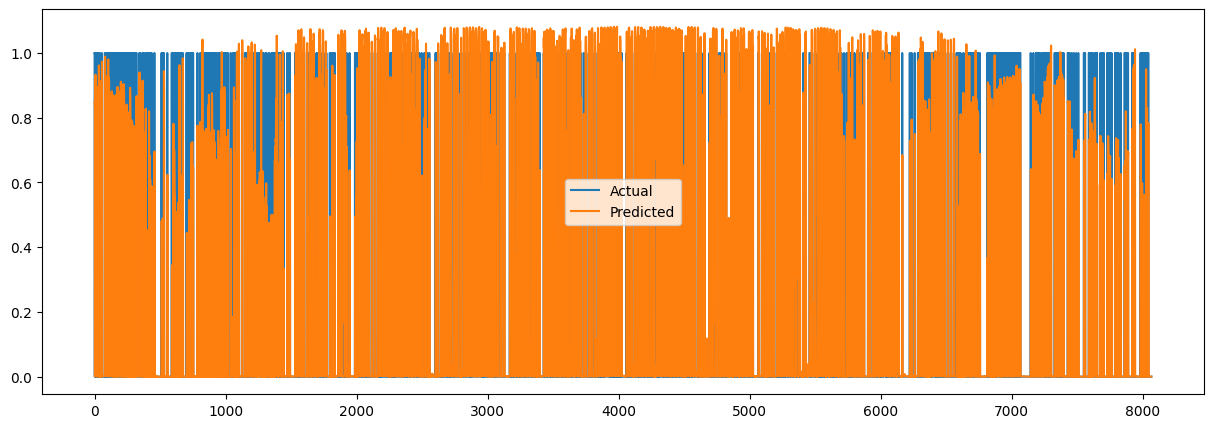

In [704]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,5)

from sklearn.metrics import *
from math import sqrt

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)

#plotting predicted test value vs actual test value
plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

1261/1261 [==============================] - 4s 3ms/step


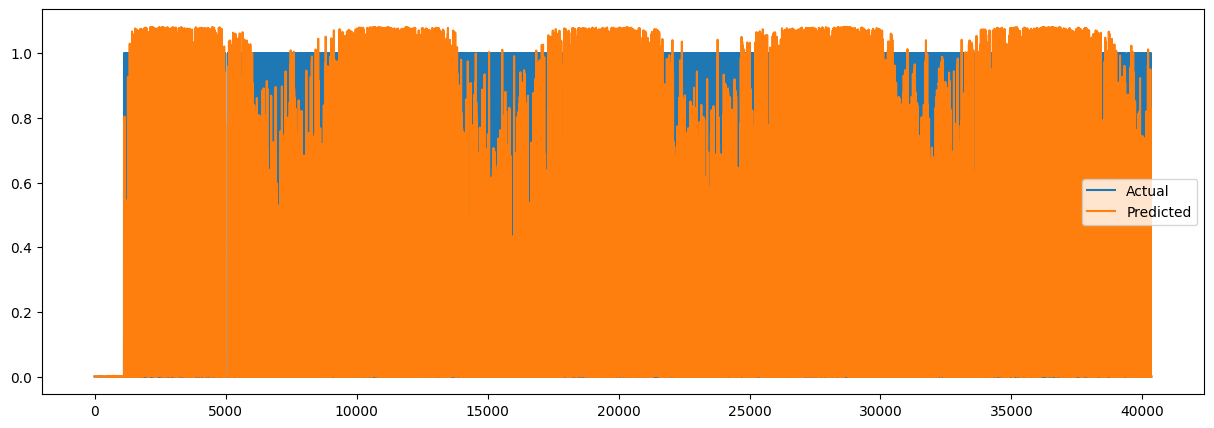

In [705]:
#visualization over full data
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

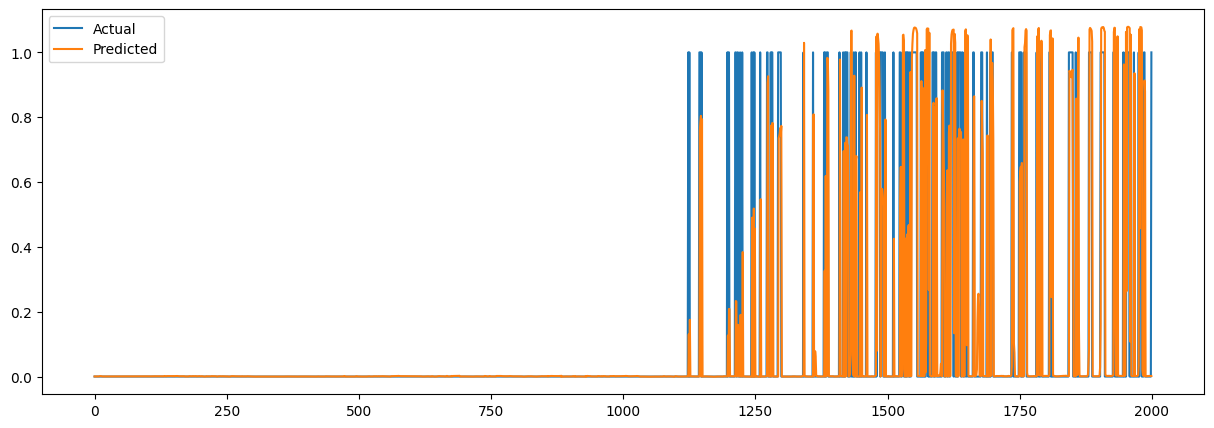

In [706]:
#over small part of data
plt.plot(tes[:2000], label = 'Actual')
plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

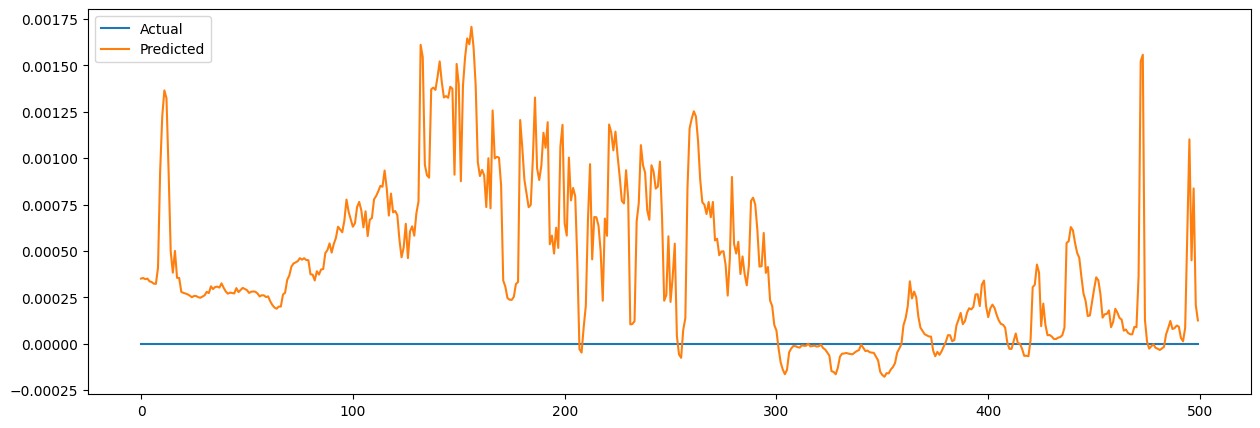

In [707]:
#over very small part of data
plt.plot(tes[:500], label = 'Actual')
plt.plot(fp[:500], label = 'Predicted')
plt.legend()
plt.show()

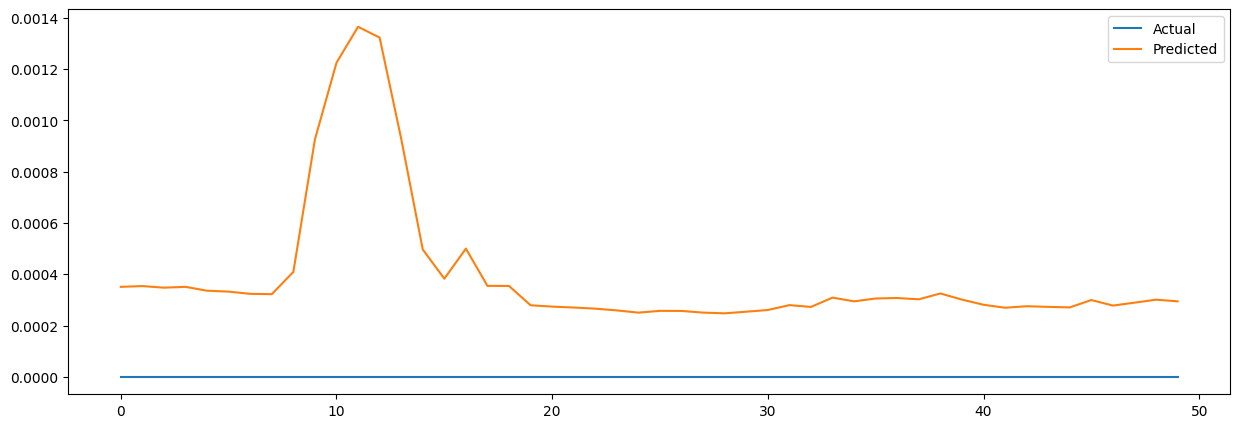

In [708]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

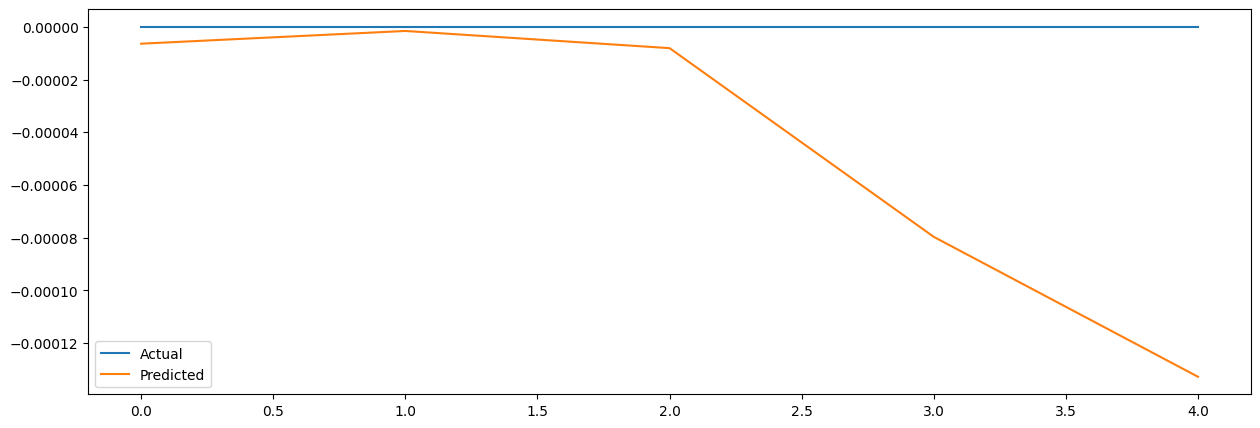

In [597]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()

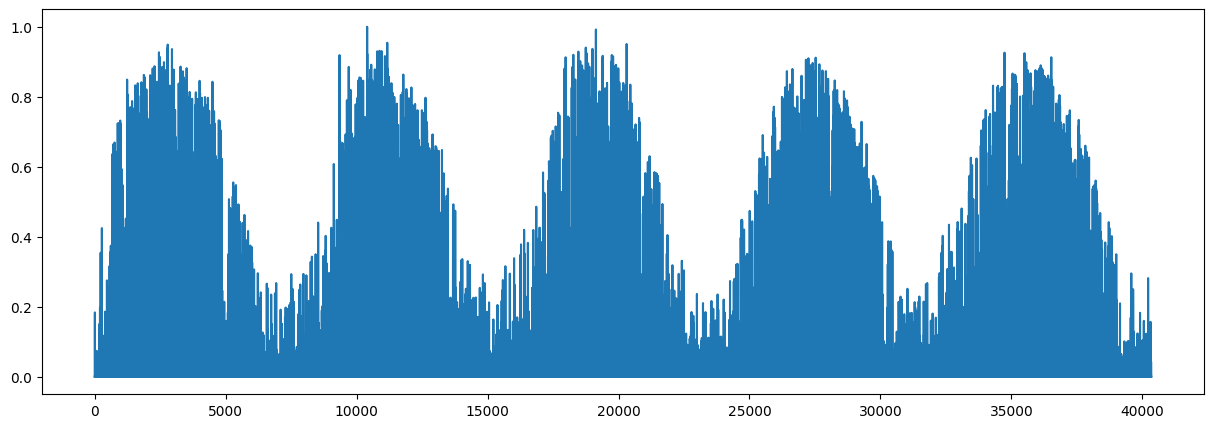

In [654]:
plt.plot(scaled[5], label = 'Actual')

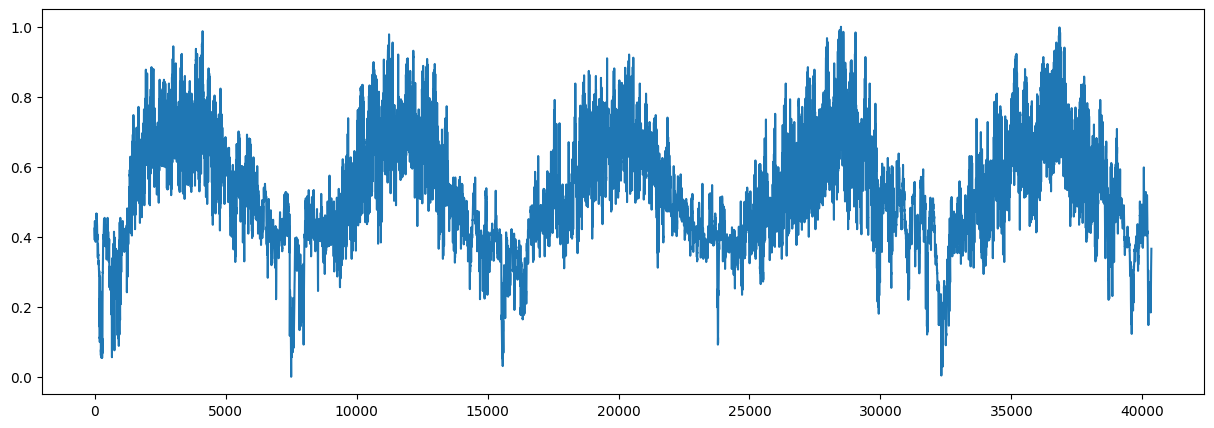

In [655]:
plt.plot(scaled[4], label = 'Actual')

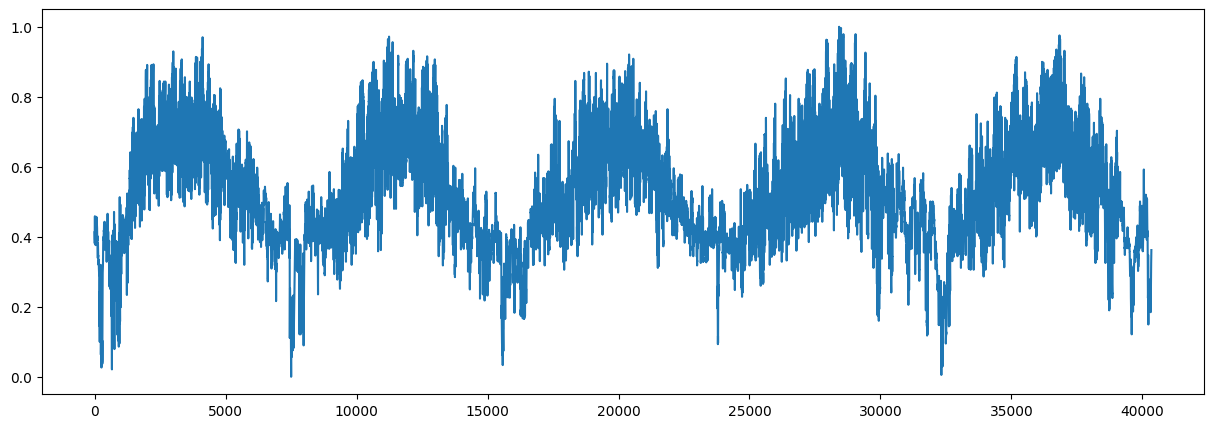

In [651]:
plt.plot(scaled[3], label = 'Actual')

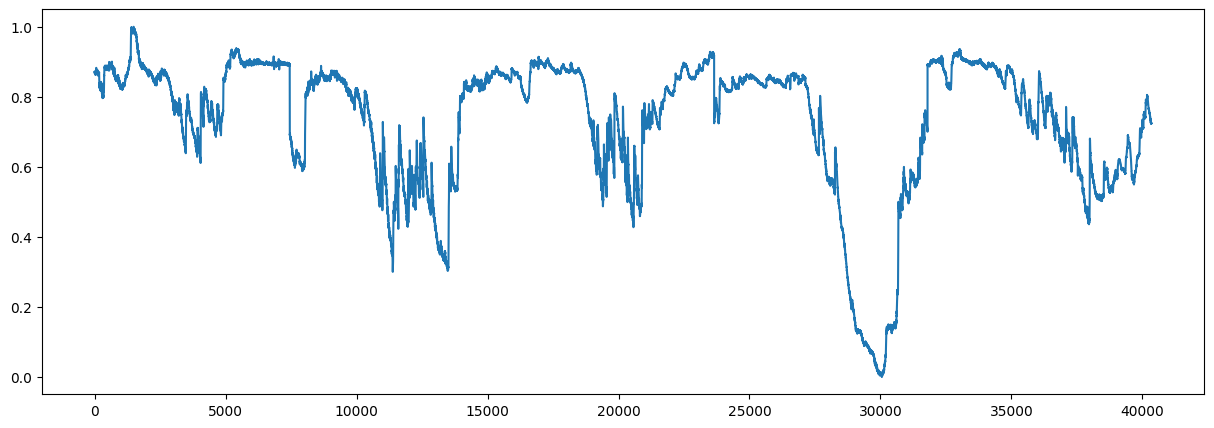

In [599]:
plt.plot(scaled[2], label = 'Actual')

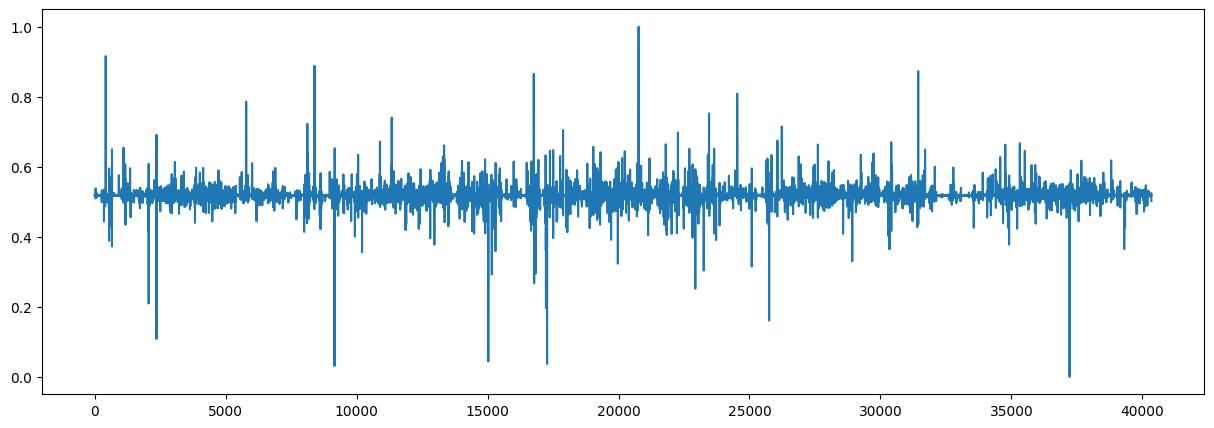

In [600]:
plt.plot(scaled[1], label = 'Actual')

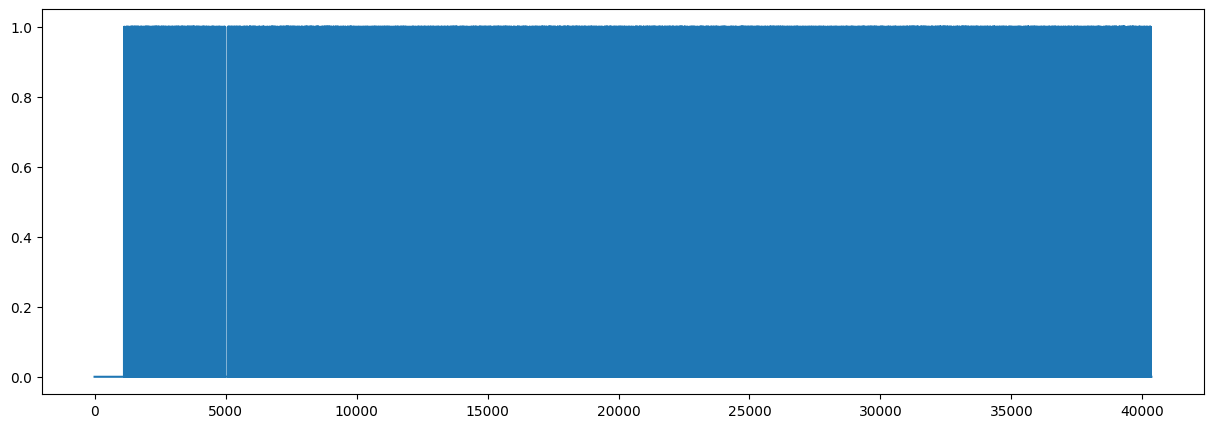

In [601]:
plt.plot(scaled[0], label = 'Actual')

In [629]:
n_steps = 5
window_length = n_steps + 1 # zmienna docelowa = sygnał wejściowy przesunięty o jeden znak do przodu
dataset['fco2_HQ']=dataset['fco2_HQ'].astype('int64')
dataset2 = tf.data.Dataset.from_tensor_slices(dataset)
dataset2 = dataset2.repeat().window(window_length, shift=1, drop_remainder=True)

In [630]:
dataset2 = dataset2.flat_map(lambda window: window.batch(window_length))

In [631]:
batch_size = 32
dataset2 = dataset2.shuffle(10000).batch(batch_size)
dataset2 = dataset2.map(lambda windows: (windows[:, :-1], windows[:, 1:]))

In [632]:
dataset2 = dataset2.prefetch(1)

In [634]:
#dataset2 = dataset2.map(
 #   lambda X_batch, Y_batch: (tf.one_hot(X_batch, depth=1, dtype=tf.float32), Y_batch))

In [635]:
for X_batch, Y_batch in dataset2.take(1):
    print(X_batch.shape, Y_batch.shape)

(32, 5, 16) (32, 5, 16)


In [636]:
train_size = 40342 * 90 // 100

In [637]:
model = keras.models.Sequential([
    keras.layers.GRU(16, return_sequences=True, input_shape=[None,16],
                     # nie ma porzucania w stanowej sieci rekurencyjnej (https://github.com/ageron/handson-ml2/issues/32)
                     # dropout=0.2, recurrent_dropout=0.2,
                     ),
    keras.layers.GRU(16, return_sequences=True,
                     # dropout=0.2, recurrent_dropout=0.2
                    ),
    keras.layers.TimeDistributed(keras.layers.Dense(1,
                                                    activation="softmax"))
])
#model.compile(loss="sparse_categorical_crossentropy", optimizer="adam")
model.compile(loss="mse", optimizer="adam")
history = model.fit(dataset2, steps_per_epoch=train_size // batch_size,epochs=10)
#history = model.fit(dataset, epochs=20,validation_data=(X_batch, Y_batch))

Epoch 1/10
1134/1134 [==============================] - 20s 12ms/step - loss: 100666.0078
Epoch 2/10
1134/1134 [==============================] - 11s 10ms/step - loss: 99750.7344
Epoch 3/10
1134/1134 [==============================] - 10s 9ms/step - loss: 99984.7734
Epoch 4/10
1134/1134 [==============================] - 10s 9ms/step - loss: 100119.0312
Epoch 5/10
1134/1134 [==============================] - 12s 10ms/step - loss: 100152.3281
Epoch 6/10
1134/1134 [==============================] - 10s 9ms/step - loss: 99964.3906
Epoch 7/10
1134/1134 [==============================] - 11s 9ms/step - loss: 100178.0234
Epoch 8/10
1134/1134 [==============================] - 10s 9ms/step - loss: 100147.1641
Epoch 9/10
1134/1134 [==============================] - 9s 8ms/step - loss: 100107.6719
Epoch 10/10
1134/1134 [==============================] - 9s 8ms/step - loss: 99750.6250


In [ ]:
X_new = 
Y_pred = model.predict(X_new)[:, -1,-1][..., np.newaxis]